# Model Assessment

In this notebook, I'm trying to find the best model complexity
for house sales dataset.

For finding the optimal degree for polynomial regression model:
* Divide dataset into train, validation and test sets
* Train a model on train set for different model complexities
* Evaluate model on validation set to get the best result on all of trained models
* Select the best one and evaluate it on the test set

In [60]:
import matplotlib.pyplot as plt
from turicreate import SFrame, SArray, linear_regression

plt.style.use("ggplot")

## Create feature matrix

The below function creates the feature matrix based on the 
given **SArray** and degree.  
It forms a new **Sframe** like:  
power_1, power_2, ..., power_n  
1, 1, ..., 1  
7, 49, ..., 49^n  

In [61]:
def create_polynomial_features(feature: SArray,
                               degree: int = 1) -> SFrame:
    """
    Creates feature matrix of the given feature and degree
    """
    
    features = SFrame(
        {f"power_{i}": feature ** i for i in range(1, degree + 1)}
    )
    return features

In [64]:
# Test function
tmp_data = SArray([1, 4, 6])
# should square and cube each item
polynomial_features = create_polynomial_features(tmp_data, 3)
polynomial_features

power_1,power_2,power_3
1.0,1.0,1.0
4.0,16.0,64.0
6.0,36.0,216.0


## Prepare Data
Now I'm going to load the dataset and sort it by **sqft_living** and **price** columns

In [65]:
sales = SFrame("./home_data.sframe").sort(["sqft_living", "price"])

In [67]:
def plot_polynomial_model(dataset: SFrame, output: SArray, title: str) -> None:
    """
    Plots the true value and the predicted value
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(dataset["power_1"], dataset["price"], color="y", label="real data")
    ax.plot(dataset["power_1"], output, "r", label="predictions")
    ax.set_ylabel("price")
    ax.set_xlabel("sqft_living")
    ax.set_title(title)
    ax.legend()
    plt.show()

## Train

In this section, different degrees are used to train a polynomial model on different datasets.
1. Train degrees 1, 2, 3 and 15 on whole dataset for **sqft_living** feature: This will
shows us increasing the accuracy of the model by increasing the complexity
2. Split the dataset to 4 subsets and try a polynomial model with the degree of 15 on all of
them to see how fits are different from each other
3. Split the dataset to train, validation and test set for cross-over validation
for finding the optimal model complexity and model evaulation  


As you can see, fitting gets better by increasing the degree.

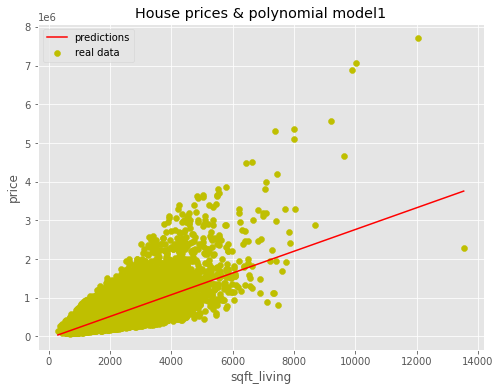

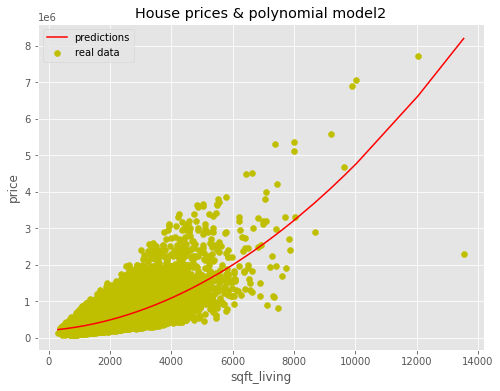

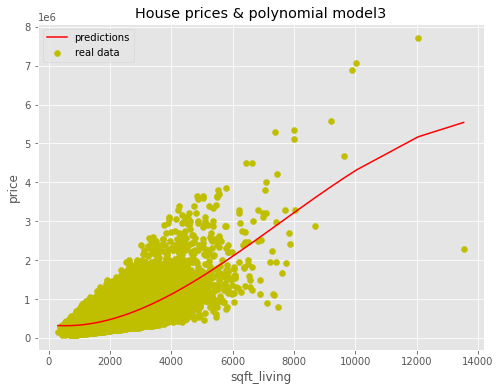

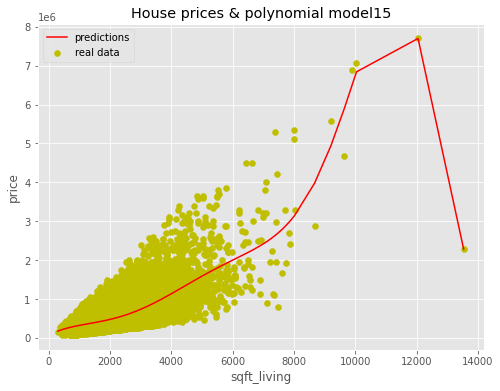

In [68]:
for i in [1, 2, 3, 15]:
    data = create_polynomial_features(sales["sqft_living"], i)
    features = data.column_names()
    data["price"] = sales["price"]
    
    model = turicreate.linear_regression.create(
        data, "price", features,
        validation_set=None, verbose=False
    )
    
    plot_polynomial_model(data, model.predict(data), f"House prices & polynomial model{i}")

**High** complexity causes various fits on different dataset, which are not similar at all.
So variance increases and it cannot be generalized to real world data.

In [70]:
# creating 4 different datasets
sub_d1, sub_d2 = sales.random_split(0.5, seed=0)
set_1, set_2 = sub_d1.random_split(0.5, seed=0)
set_3, set_4 = sub_d2.random_split(0.5, seed=0)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.7502509965    |   804013.0575217252    |
|   power_1   |  None |    118.08612758320274   |   3341.9421818626765   |
|   power_10  |  None | -2.4203181206552257e-34 | 4.4522932414776664e-29 |
|   power_11  |  None |  -1.996012069499398e-38 |          nan           |
|   power_12  |  None | -1.0770990379575832e-42 | 3.285230472938496e-37  |
|   power_13  |  None | -2.7286281790642286e-47 |          nan           |
|   power_14  |  None |  2.447826931450097e-51  |          nan           |
|   power_15  |  None |  5.019752328648901e-55  | 8.716198929822137e-51  |
|   power_2   |  None |   -0.04734820113178316  |    5.61169183885296    |
|   power_3   |  None |  3.253103424628785e-05  |  0.004934670293967462  |
+-------------+-------+--

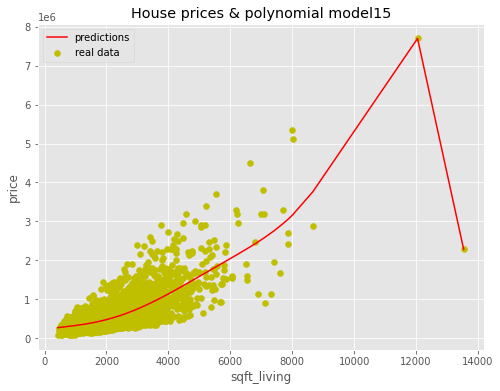

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    89836.50774062006    |   1649531.0021311995   |
|   power_1   |  None |    319.8069467450097    |   9092.393840601579    |
|   power_10  |  None |  1.1840818826942796e-32 | 4.246229928269893e-27  |
|   power_11  |  None |  1.9834800036456072e-37 |          nan           |
|   power_12  |  None |  -9.925335900907942e-41 | 9.306757911145838e-35  |
|   power_13  |  None | -1.6083484708967387e-44 | 1.324083804435222e-38  |
|   power_14  |  None |  -9.120060243044928e-49 | 7.756588652015745e-43  |
|   power_15  |  None |  1.6863665834566165e-52 | 1.7787876276178307e-47 |
|   power_2   |  None |   -0.10331539702523748  |   20.454738135714845   |
|   power_3   |  None |  1.066824760088162e-05  |  0.024227767275043034  |
+-------------+-------+--

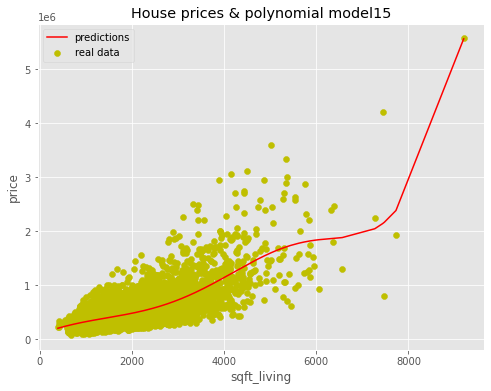

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    87317.97955733992    |   1899353.1003088504   |
|   power_1   |  None |    356.3049110409227    |   9972.637304995473    |
|   power_10  |  None | -3.6214942651510763e-34 |  8.4662630685648e-28   |
|   power_11  |  None |  -4.271195272459509e-37 | 1.2519770927068442e-31 |
|   power_12  |  None |  -5.614459717025554e-41 |  8.1717125483774e-36   |
|   power_13  |  None |  -3.874527728976052e-45 | 4.352684055454668e-40  |
|   power_14  |  None |  4.694303590243245e-50  | 2.6108161309810155e-44 |
|   power_15  |  None |  6.390458860333654e-53  | 6.321939957807425e-49  |
|   power_2   |  None |   -0.16481744280706506  |   21.971169594595253   |
|   power_3   |  None |  4.4042499269838386e-05 |  0.02686701628218331   |
+-------------+-------+--

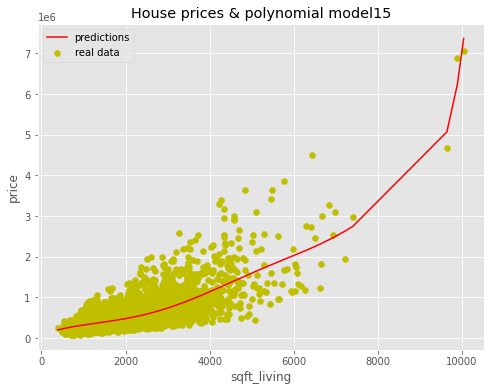

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    259020.87944009615   |   1347732.9469143716   |
|   power_1   |  None |   -31.727716173253842   |   8419.782158668699    |
|   power_10  |  None | -2.7063158329634365e-32 |          nan           |
|   power_11  |  None |  6.723704112181739e-36  | 7.664238563580854e-31  |
|   power_12  |  None |  1.7411564633664226e-39 | 1.2414271145573414e-34 |
|   power_13  |  None |  2.091883757588288e-43  | 1.244975858698362e-38  |
|   power_14  |  None |  4.780155652077338e-48  | 7.185364860174217e-43  |
|   power_15  |  None |  -4.745353330770019e-51 | 1.7611699089725144e-47 |
|   power_2   |  None |   0.10970276959072205   |   21.924428542753567   |
|   power_3   |  None | -1.5838384725521236e-05 |  0.03144459926239816   |
+-------------+-------+--

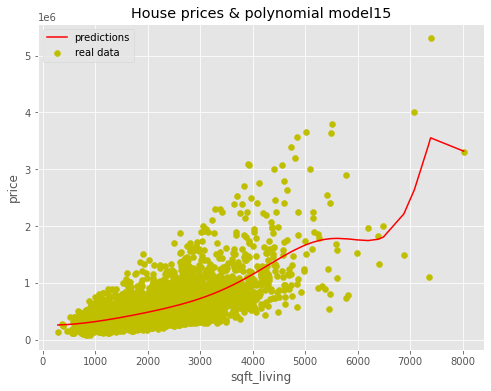

In [71]:
for dataset in [set_1, set_2, set_3, set_4]:
    
    data = create_polynomial_features(dataset["sqft_living"], 15)
    features = data.column_names()
    data["price"] = dataset["price"]
    
    model = turicreate.linear_regression.create(
        data, "price", features,
        validation_set=None, verbose=False
    )
    
    print(model.coefficients)
    plot_polynomial_model(data, model.predict(data), f"House prices & polynomial model{i}")

## Validation Set

In order to find the best degree to train the model with, we can use
validation set. After finding the degree which has the lowest **RSS** on its validation set,
We will find the **RSS** on its corresponding test set.

Our config will be as:
* 45% Train data
* 45% Validation data
* 10% Test data

In [39]:
training_and_validation, test_set = sales.random_split(.9, seed=1)
train_set, validation_set = training_and_validation.random_split(.5, seed=1)

In [40]:
def compute_rss(prediction, true_value):
    return ((prediction - true_value)**2).sum()

In [45]:
models = {}
for i in range(1, 16):
    train = create_polynomial_features(train_set["sqft_living"], i)
    validation = create_polynomial_features(validation_set["sqft_living"], i)
    features = train.column_names()
    
    train["price"] = train_set["price"]
    validation["price"] = validation_set["price"]
    
    model = turicreate.linear_regression.create(
        train, "price", features, validation_set=None, verbose=False
    )
    
    rss = compute_rss(model.predict(validation), validation["price"])
    models[i] = (model, rss)
    print(f"RSS for Model {i}: {rss}") 

RSS for Model 1: 676709775198048.0
RSS for Model 2: 607090530698013.2
RSS for Model 3: 616714574532763.2
RSS for Model 4: 609129230654382.5
RSS for Model 5: 599177138583639.8
RSS for Model 6: 589182477809779.8
RSS for Model 7: 591717038418299.8
RSS for Model 8: 601558237777346.2
RSS for Model 9: 612563853987570.5
RSS for Model 10: 621744288937841.9
RSS for Model 11: 627012012704756.6
RSS for Model 12: 627757914764686.5
RSS for Model 13: 624738503265293.5
RSS for Model 14: 619369705896862.9
RSS for Model 15: 613089202410957.4


After computing the RSS for each model, let's find the lowest value among them.
It will be 6.

In [78]:
sorted_models = sorted(models.items(), key=lambda i: i[1][1])
optimal_deg = sorted_models[0][0]

In [79]:
chosen_model, _ = models[optimal_deg]
test = create_polynomial_features(test_set["sqft_living"], optimal_deg)
test["price"] = test_set["price"]
pred = chosen_model.predict(test)
rss = compute_rss(pred, test["price"])
print(rss)

125529337848169.66
